In [173]:
from sklearn.linear_model import LinearRegression  , Ridge, Lasso
from sklearn.model_selection import train_test_split 

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics         import mean_absolute_error , mean_squared_error 



In [112]:
# 각 조별 프로젝트 진행하시면 됩니다 

# 각 피처에 대한 설명 이해

# 데이터 타입과 null 값 획인 및 전처리
# null 값이 많은 컬럼과 불필요하다고 생각되는 컮럼 삭제
# drop 하지 않은 컬럼 중 숫자형 null 컬럼들은 평균값으로 대체
# 문자열값은 원-핫 인코딩 진행


# 타겟값 분포 확인 및 스케일링
# 피처값 스케일링

# 학습 예측 평가 

# GridSearchCV 교차검증을 통한 학습 예측 평가 

# 최종 RMSE 값 

In [113]:
train = pd.read_csv('./data/kaggle_house_train.csv')
test = pd.read_csv('./data/kaggle_house_test.csv')

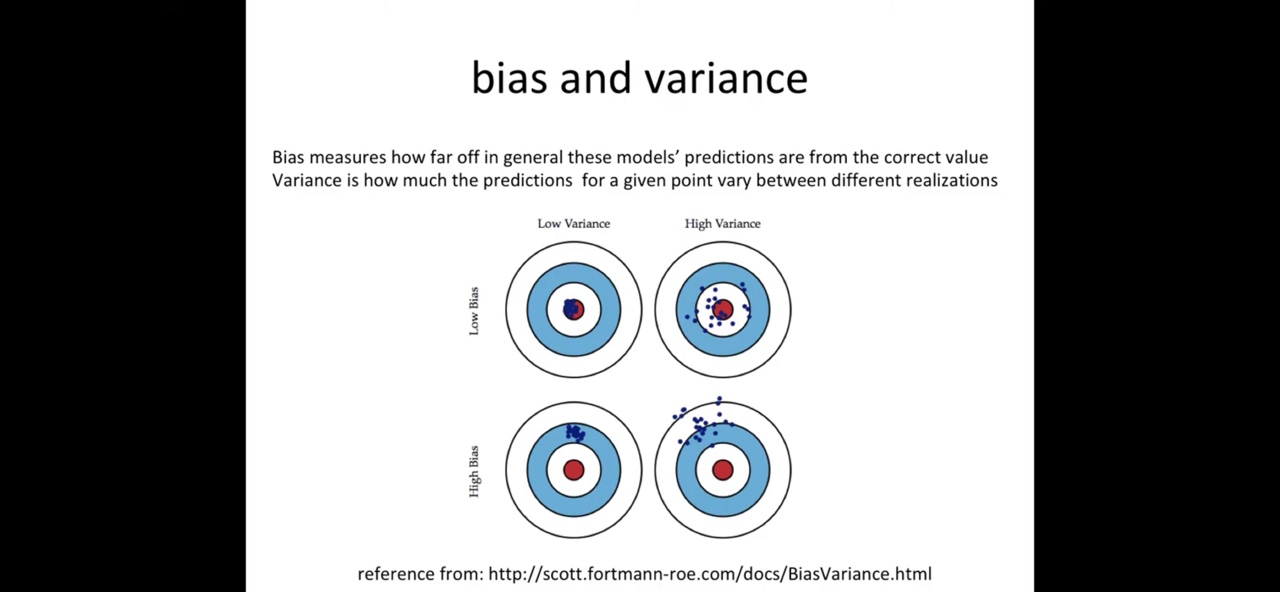

In [11]:
from IPython.display import Image
Image('c:/fitting_img/fitting17.jpg', width = 700)

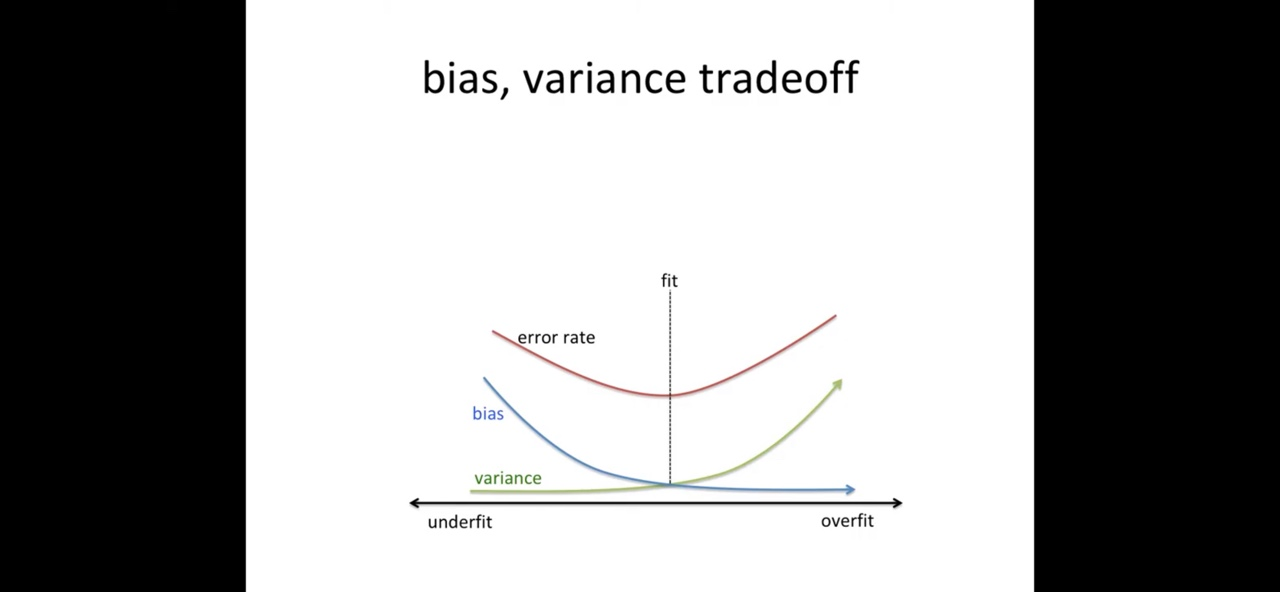

In [12]:
Image('c:/fitting_img/fitting18.jpg', width = 700)

In [13]:
train.shape , test.shape

((1460, 81), (1459, 80))

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
# 결측값 확인
# train.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [115]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
# 피처 타입 수 확인
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [25]:
# 각 피처의 null 건수 확인 
series = train.isnull().sum()
series[series > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

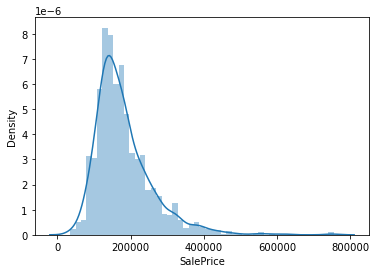

In [26]:
sns.distplot(train['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

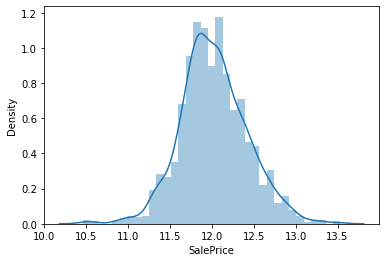

In [31]:
# 타켓의 스케일링 -> 로그변환
log_target = np.log1p(train['SalePrice'])
sns.distplot(log_target)

In [116]:
salePrice = train['SalePrice']
train['SalePrice'] = log_target
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [117]:
# 전처리

# null 값과 타입 추출
null_cnt = train.isnull().sum()[train.isnull().sum() > 0 ]
# type(null_cnt.index)
# null_cnt.index
train.dtypes[null_cnt.index]


LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [118]:
# 문자컬럼은 삭제 , 숫자컬럼은 평균으로 대체
train.drop( ['Id', 'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
             'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 
             'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] , 
            axis = 1 , inplace=True)



In [119]:
train.fillna(train.mean() , inplace=True)

In [120]:
train.isnull().sum().sum()

0

In [121]:
train.shape

(1460, 64)

In [122]:
ohe_train = pd.get_dummies(train)
ohe_train.shape

(1460, 219)

In [123]:
ohe_null_cnt = ohe_train.isnull().sum()[ohe_train.isnull().sum() > 0 ]
# type(null_cnt.index)
# null_cnt.index
ohe_train.dtypes[ohe_null_cnt.index]

Series([], dtype: object)

In [126]:
ohe_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [130]:
# 피처 스케일링과 교차검증없이 모델생성 학습 예측 평가
target   = ohe_train['SalePrice']
features = ohe_train.drop('SalePrice' , axis=1 , inplace=False)

In [176]:
X_train , X_test , y_train, y_test = train_test_split(features, target , test_size=0.2 , random_state=100)

price_model = LinearRegression()
price_model.fit(X_train , y_train)
# 미지의 데이터를 넣어서 예측
y_pred = price_model.predict(X_test)


# w ** 2 패널티를 부여해서 회귀계수를 개선하는 규제방식 
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


# |w| 패널티를 부여해서 회귀계수를 개선하는 규제방식 
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)



In [177]:
print('linear ')
print('mae  : ' , mean_absolute_error(y_test , y_pred))
print('mse  : ' , mean_squared_error(y_test , y_pred))
print('rmse : ' , np.sqrt(mean_squared_error(y_test , y_pred)) )
# 결정계수 R
print('R    : ' , price_model.score(features , target))

print('ridge ')
print('mae  : ' , mean_absolute_error(y_test , y_pred_ridge))
print('mse  : ' , mean_squared_error(y_test , y_pred_ridge))
print('rmse : ' , np.sqrt(mean_squared_error(y_test , y_pred_ridge)) )
# 결정계수 R
print('R    : ' , price_model.score(features , target))

print('lasso ')
print('mae  : ' , mean_absolute_error(y_test , y_pred_lasso))
print('mse  : ' , mean_squared_error(y_test , y_pred_lasso))
print('rmse : ' , np.sqrt(mean_squared_error(y_test , y_pred_lasso)) )
# 결정계수 R
print('R    : ' , price_model.score(features , target))


linear 
mae  :  0.09154877722350369
mse  :  0.024321164340543804
rmse :  0.15595244256036456
R    :  0.92874013861561
ridge 
mae  :  0.08747585389587988
mse  :  0.017569720029155095
rmse :  0.13255082055255296
R    :  0.92874013861561
lasso 
mae  :  0.13267851793258395
mse  :  0.037236337925430775
rmse :  0.1929671939098218
R    :  0.92874013861561


In [182]:
target   = ohe_train['SalePrice']
features = ohe_train.drop('SalePrice' , axis=1 , inplace=False)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

def feature_scaling(method='None' , input_data=None):
    
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    
    if method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    
    return scaled_data

In [183]:
scal_features = feature_scaling(method='MinMax' , input_data=features)

In [184]:
X_train , X_test , y_train, y_test = train_test_split(scal_features, target , test_size=0.2 , random_state=100)

scaling_model = LinearRegression()
scaling_model.fit(X_train , y_train)

# 미지의 데이터를 넣어서 예측
y_pred = scaling_model.predict(X_test)


ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)





In [185]:
print('mae  : ' , mean_absolute_error(y_test , y_pred))
print('mse  : ' , mean_squared_error(y_test , y_pred))
print('rmse : ' , np.sqrt(mean_squared_error(y_test , y_pred)) )
# 결정계수 R
print('R    : ' , scaling_model.score(scal_features , target))



print('ridge ')
print('mae  : ' , mean_absolute_error(y_test , y_pred_ridge))
print('mse  : ' , mean_squared_error(y_test , y_pred_ridge))
print('rmse : ' , np.sqrt(mean_squared_error(y_test , y_pred_ridge)) )
# 결정계수 R
print('R    : ' , price_model.score(scal_features , target))

print('lasso ')
print('mae  : ' , mean_absolute_error(y_test , y_pred_lasso))
print('mse  : ' , mean_squared_error(y_test , y_pred_lasso))
print('rmse : ' , np.sqrt(mean_squared_error(y_test , y_pred_lasso)) )
# 결정계수 R
print('R    : ' , price_model.score(scal_features , target))


mae  :  54690484499.71395
mse  :  1.5979126568350464e+23
rmse :  399738996951.1414
R    :  -2.0042750740383584e+23
ridge 
mae  :  0.08705406486063028
mse  :  0.016857337406828883
rmse :  0.129835809416466
R    :  -30.856896079129857
lasso 
mae  :  0.31103835626165616
mse  :  0.1721696151749893
rmse :  0.41493326592958213
R    :  -30.856896079129857


In [78]:
scal_features

array([[0.23529412, 0.15068493, 0.0334198 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.20205479, 0.03879502, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.1609589 , 0.04650728, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.29411765, 0.15410959, 0.03618687, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.1609589 , 0.03934189, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.18493151, 0.04037019, ..., 0.        , 1.        ,
        0.        ]])

In [181]:
10 > 1
-1 > -10
# 교차검증
# ridge , lasso
from sklearn.model_selection import cross_val_score

rmse_list = np.sqrt(-cross_val_score(ridge_model,
                                     features, 
                                     target,
                                     scoring="neg_mean_squared_error", cv = 5))
rmse_list
rmse_avg = np.mean(rmse_list)
print('\nCV RMSE 값 리스트: {}'.format( np.round(rmse_list, 3)))
print('CV 평균 RMSE 값: {}'.format( np.round(rmse_avg, 3)))




CV RMSE 값 리스트: [0.112 0.151 0.138 0.117 0.193]
CV 평균 RMSE 값: 0.142


In [161]:
house_df = pd.read_csv('./data/kaggle_house_train.csv')
test = pd.read_csv('./data/kaggle_house_test.csv')

In [162]:
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

In [163]:
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)

house_df.fillna(house_df.mean(),inplace=True)

In [164]:
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [165]:
house_df_ohe = pd.get_dummies(house_df)

In [166]:
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

get_dummies() 수행 후 데이터 Shape: (1460, 271)


In [169]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

y_pred = lr_reg.predict(X_test)


In [170]:
print('mae  : ' , mean_absolute_error(y_test , y_pred))
print('mse  : ' , mean_squared_error(y_test , y_pred))
print('rmse : ' , np.sqrt(mean_squared_error(y_test , y_pred)) )
# 결정계수 R
print('R    : ' , lr_reg.score(X_features , y_target))

mae  :  0.08922920195464136
mse  :  0.017396493033736662
rmse :  0.13189576579153958
R    :  0.9346450370850511


In [171]:
# 교차검증
from sklearn.model_selection import cross_val_score

rmse_list = np.sqrt(-cross_val_score(lr_reg,
                                     X_features, 
                                     y_target,
                                     scoring="neg_mean_squared_error", cv = 5))
rmse_avg = np.mean(rmse_list)
print('\nCV RMSE 값 리스트: {}'.format( np.round(rmse_list, 3)))
print('CV 평균 RMSE 값: {}'.format( np.round(rmse_avg, 3)))



CV RMSE 값 리스트: [1.350000e-01 3.443905e+03 1.680000e-01 1.110000e-01 1.980000e-01]
CV 평균 RMSE 값: 688.903
